# Recordando la sucesión de Fibonacci 

Recordamos que la sucesión de Fibonacci está definidad como sigue. 

Sea $f_1 = f_2 = 1$ y 
$$
    f_{n+1} = f_n + f_{n-1}.
$$

Ahora si se considera la sucesión de los cocientes de los elementos de la sucesión, esto es 
$$
    F_n = \frac{f_{n+1}}{f_n}
$$

se puede demostrar que 
$$
    \lim_{n\to\infty} F_n = φ
$$
 donde $φ = \frac{1+\sqrt{5}}{2}$.

In [1]:
import numpy as np

def fibonacci(n):
    """regresa los primeros n elementos de la sucesión de Fibonacci
    
    Parameters
    ----------
    n: int número de valores de la sucesión de Fibonacci

    Returns
    -------
    np.array primeros n elementos de la sucesión de Fibonacci
    """
    fib = np.zeros(n+1, dtype=np.float128)
    fib[1] = 1

    for n in range(2, n+1):
        fib[n] = fib[n-1] + fib[n-2]
    
    return fib[1:]

In [2]:
fib_101 = fibonacci(101)
print(fib_101.shape)

(101,)


In [3]:
F_100 = fib_101[1:]/fib_101[:-1]

In [5]:
print(F_100[:10])

[1.         2.         1.5        1.66666667 1.6        1.625
 1.61538462 1.61904762 1.61764706 1.61818182]


# Matplolib

La principal biblioteca para graficar en Python es [`matplotlib`](https://matplotlib.org/). 

In [4]:
from matplotlib import pyplot as plt

## plt.plot

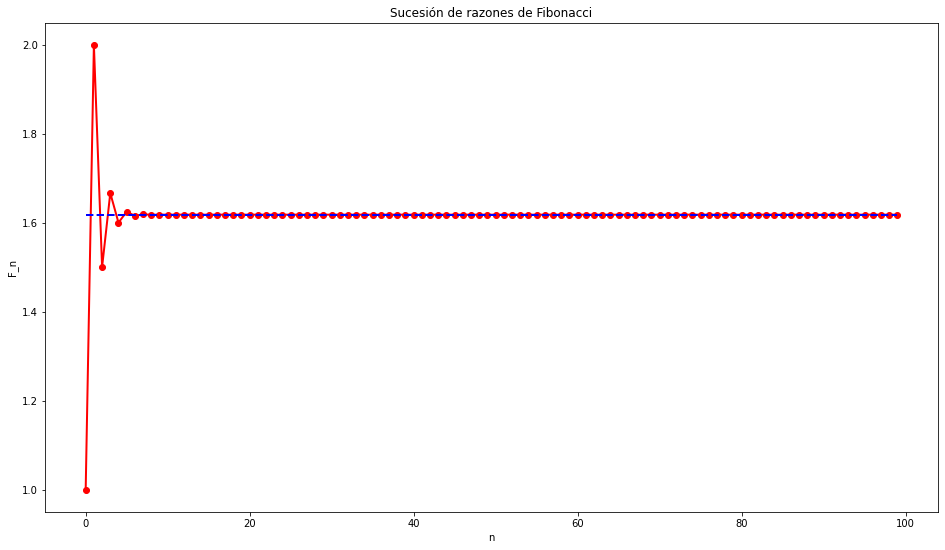

In [13]:
plt.figure(figsize=(16, 9))
plt.plot(F_100, linewidth=2, color='red', marker='o')
plt.ylabel('F_n')
plt.xlabel('n')
plt.title('Sucesión de razones de Fibonacci')
phi = (1+np.sqrt(5))/2
vec_phi = phi * np.ones_like(F_100) # phi * np.ones(F_100.shape)
plt.plot(vec_phi, color='blue', linewidth=2, linestyle='--')

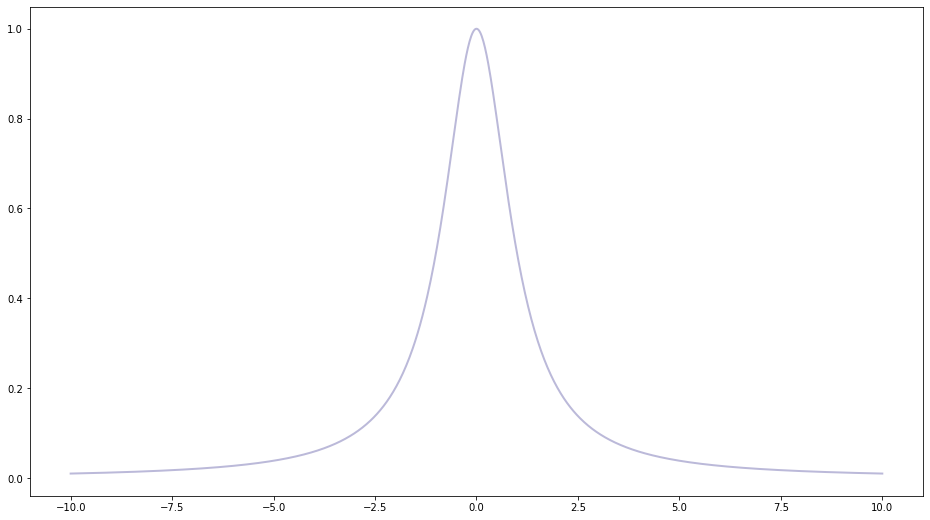

In [16]:
# Graficar funciones
# y = f(x) = 1/(1+x^2)
x = np.linspace(-10, 10, num=1000, dtype=np.float)
y = 1/(1 + x**2)
plt.figure(figsize=(16, 9))
plt.plot(x, y, linewidth=2, color='#bbb9d9')

## plt.scatter

In [17]:
SEABORN_DATASETS_URL = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master'

In [19]:
# Cargar datos
# with open('file.pkl', 'r') as f:
#   datos = f.read()
# 
# datos = np.loadtxt('archivo.txt')
#
# with rio.open('satelite.tif', 'r') as f:
#    datos = f.load()

datasource = np.DataSource()
archivo_pinguinos = datasource.open(SEABORN_DATASETS_URL + '/penguins.csv')

In [20]:
datos_pinguinos = np.genfromtxt(
    archivo_pinguinos, 
    delimiter=',', 
    names=True,
    dtype=[
           ('species', '|S10'), 
           ('island', '|S15'),
           ('bill_length_mm', float),
           ('bill_depth_mm', float),
           ('flipper_length_mm', float),
           ('body_mass_g', float),
           ('sex', '|S10')
    ])

In [21]:
print(type(datos_pinguinos))

<class 'numpy.ndarray'>


In [22]:
print(datos_pinguinos.shape)

(344,)


In [23]:
print(datos_pinguinos[:10])

[(b'Adelie', b'Torgersen', 39.1, 18.7, 181., 3750., b'MALE')
 (b'Adelie', b'Torgersen', 39.5, 17.4, 186., 3800., b'FEMALE')
 (b'Adelie', b'Torgersen', 40.3, 18. , 195., 3250., b'FEMALE')
 (b'Adelie', b'Torgersen',  nan,  nan,  nan,   nan, b'')
 (b'Adelie', b'Torgersen', 36.7, 19.3, 193., 3450., b'FEMALE')
 (b'Adelie', b'Torgersen', 39.3, 20.6, 190., 3650., b'MALE')
 (b'Adelie', b'Torgersen', 38.9, 17.8, 181., 3625., b'FEMALE')
 (b'Adelie', b'Torgersen', 39.2, 19.6, 195., 4675., b'MALE')
 (b'Adelie', b'Torgersen', 34.1, 18.1, 193., 3475., b'')
 (b'Adelie', b'Torgersen', 42. , 20.2, 190., 4250., b'')]


In [26]:
datos_pinguinos[np.where(datos_pinguinos['species'] == b'Adelie')]['bill_length_mm']

array([39.1, 39.5, 40.3,  nan, 36.7, 39.3, 38.9, 39.2, 34.1, 42. , 37.8,
       37.8, 41.1, 38.6, 34.6, 36.6, 38.7, 42.5, 34.4, 46. , 37.8, 37.7,
       35.9, 38.2, 38.8, 35.3, 40.6, 40.5, 37.9, 40.5, 39.5, 37.2, 39.5,
       40.9, 36.4, 39.2, 38.8, 42.2, 37.6, 39.8, 36.5, 40.8, 36. , 44.1,
       37. , 39.6, 41.1, 37.5, 36. , 42.3, 39.6, 40.1, 35. , 42. , 34.5,
       41.4, 39. , 40.6, 36.5, 37.6, 35.7, 41.3, 37.6, 41.1, 36.4, 41.6,
       35.5, 41.1, 35.9, 41.8, 33.5, 39.7, 39.6, 45.8, 35.5, 42.8, 40.9,
       37.2, 36.2, 42.1, 34.6, 42.9, 36.7, 35.1, 37.3, 41.3, 36.3, 36.9,
       38.3, 38.9, 35.7, 41.1, 34. , 39.6, 36.2, 40.8, 38.1, 40.3, 33.1,
       43.2, 35. , 41. , 37.7, 37.8, 37.9, 39.7, 38.6, 38.2, 38.1, 43.2,
       38.1, 45.6, 39.7, 42.2, 39.6, 42.7, 38.6, 37.3, 35.7, 41.1, 36.2,
       37.7, 40.2, 41.4, 35.2, 40.6, 38.8, 41.5, 39. , 44.1, 38.5, 43.1,
       36.8, 37.5, 38.1, 41.1, 35.6, 40.2, 37. , 39.7, 40.2, 40.6, 32.1,
       40.7, 37.3, 39. , 39.2, 36.6, 36. , 37.8, 36

In [30]:
np.unique(datos_pinguinos['species'])

array([b'Adelie', b'Chinstrap', b'Gentoo'], dtype='|S10')

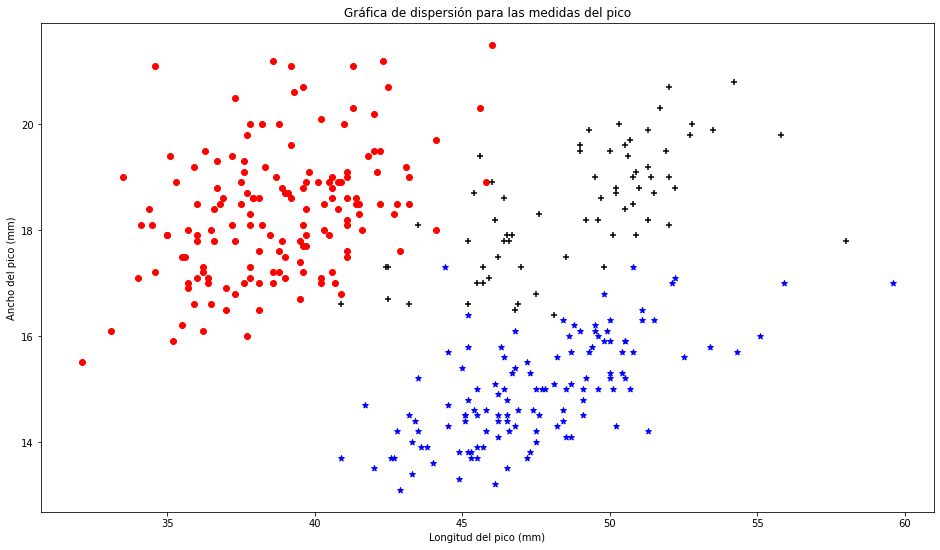

In [33]:
plt.figure(figsize=(16, 9))
plt.title('Gráfica de dispersión para las medidas del pico')
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Ancho del pico (mm)')
plt.scatter(
    datos_pinguinos[np.where(datos_pinguinos['species'] == b'Adelie')]['bill_length_mm'],
    datos_pinguinos[np.where(datos_pinguinos['species'] == b'Adelie')]['bill_depth_mm'],
    color = 'red', marker = 'o'
)
plt.scatter(
    datos_pinguinos[np.where(datos_pinguinos['species'] == b'Gentoo')]['bill_length_mm'],
    datos_pinguinos[np.where(datos_pinguinos['species'] == b'Gentoo')]['bill_depth_mm'],
    color = 'blue', marker = '*'
)
plt.scatter(
    datos_pinguinos[np.where(datos_pinguinos['species'] == b'Chinstrap')]['bill_length_mm'],
    datos_pinguinos[np.where(datos_pinguinos['species'] == b'Chinstrap')]['bill_depth_mm'],
    color = 'black', marker = '+'
)

## plt.imshow

In [34]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 70.9 MB/s 


In [36]:
import rasterio
from google.colab import drive
drive.mount('/gdrive')



Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [42]:
with rasterio.open('/gdrive/My Drive/ColabData/CUraster.tif') as img:
    cu_arreglo = img.read()

In [43]:
print(type(cu_satelite))

<class 'rasterio.io.DatasetReader'>


In [44]:
print(cu_arreglo.shape)

(4, 340, 338)


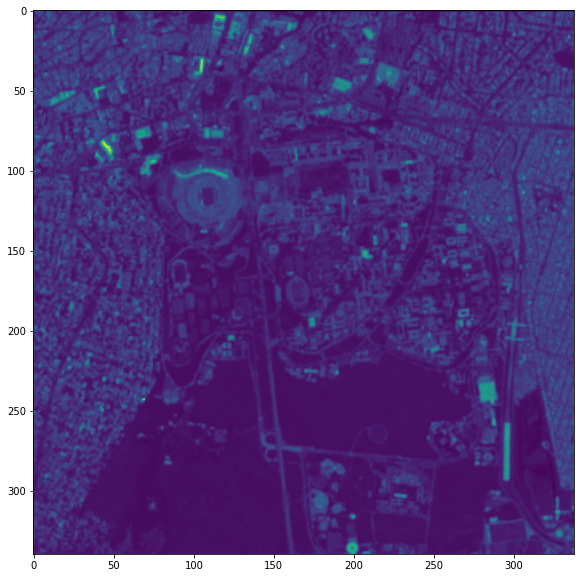

In [46]:
plt.figure(figsize = (10, 10))
plt.imshow(cu_arreglo[1, :, :])

In [47]:
cu_rgb = cu_arreglo[1:, :, :]
print(cu_rgb.shape)

(3, 340, 338)


In [48]:
cu_rgb = np.moveaxis(cu_rgb, 0, -1)
print(cu_rgb.shape)

(340, 338, 3)


In [50]:
max_by_channel = np.max(cu_rgb, axis = (0, 1))
print(max_by_channel)

[8920 8760 8416]


In [51]:
cu_rgb = cu_rgb / max_by_channel

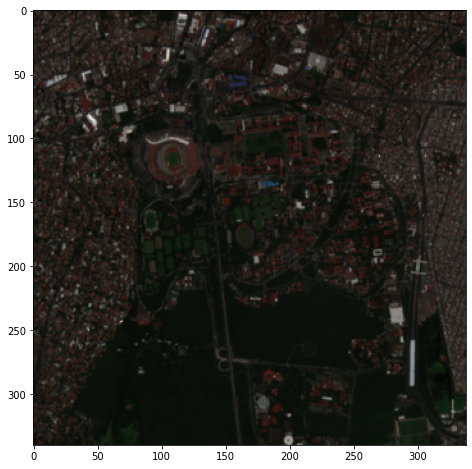

In [52]:
plt.figure(figsize=(8, 8))
plt.imshow(cu_rgb)